In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

In [3]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# Create a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [5]:
# Split the data into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [6]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

Random Forest Accuracy: 1.0


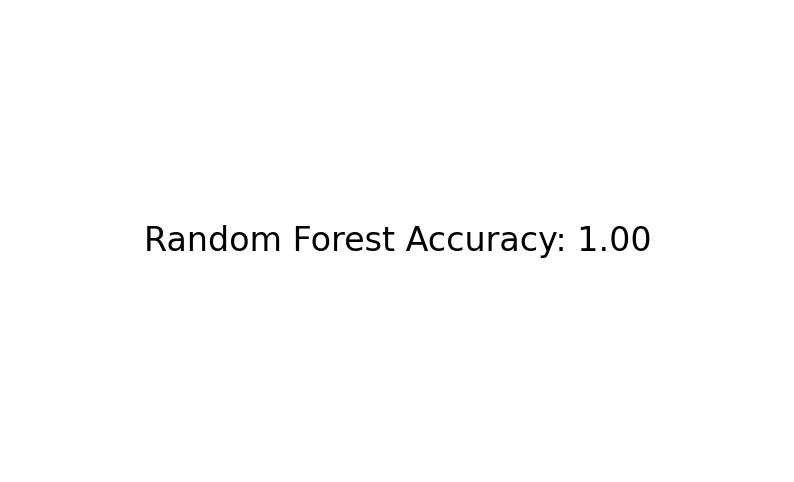

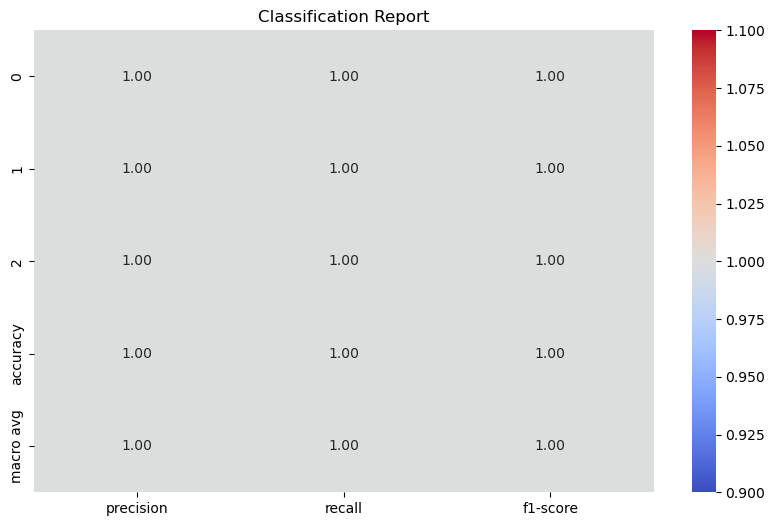

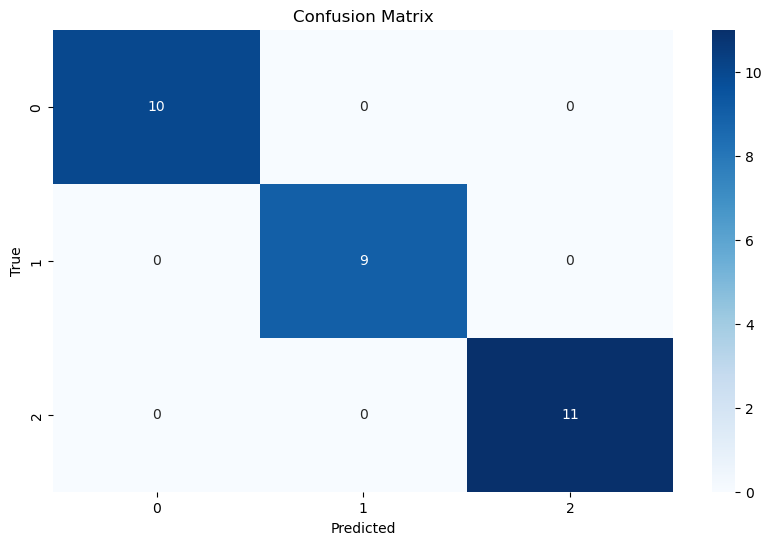

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Print classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display accuracy
plt.figure(figsize=(10, 6))
plt.text(0.5, 0.5, f"Random Forest Accuracy: {accuracy_rf:.2f}",
         fontsize=24, ha='center', va='center')
plt.axis('off')
plt.show()

# Display classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.show()

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')  # Output layer with 3 units for the 3 classes
])

C:\Users\tpasa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=0)

In [15]:
# Evaluate the model
loss, accuracy_nn = model.evaluate(X_test_scaled, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")

from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)

print("f1 score error  :",f1_score(y_test, y_pred_rf,pos_label='positive',average='micro'))
print("Precision Score : ",precision_score(y_test, y_pred_rf,pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred_rf , pos_label='positive',average='micro'))

import seaborn as sbn
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 1.0000 - loss: 0.0833
Neural Network Accuracy: 1.0
f1 score error  : 1.0
Precision Score :  1.0
Recall Score :  1.0


C:\Users\tpasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tpasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\tpasa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1561: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [16]:
# Assuming you already have the iris_df DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [17]:
# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

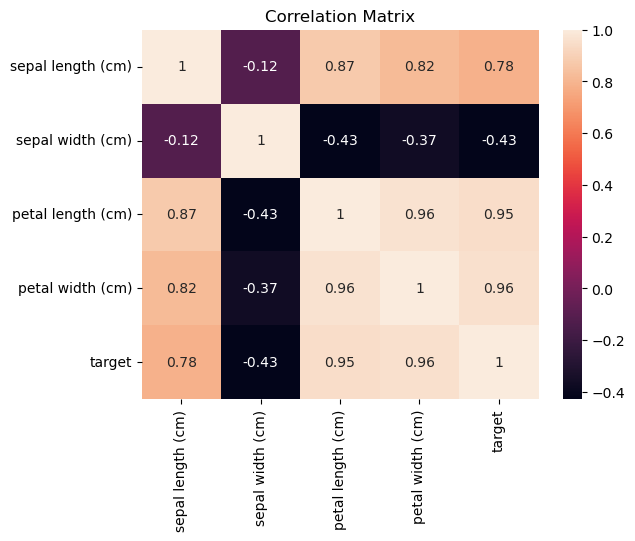

In [18]:
# Create a heatmap
sbn.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
# Show the plot
plt.show()

C:\Users\tpasa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


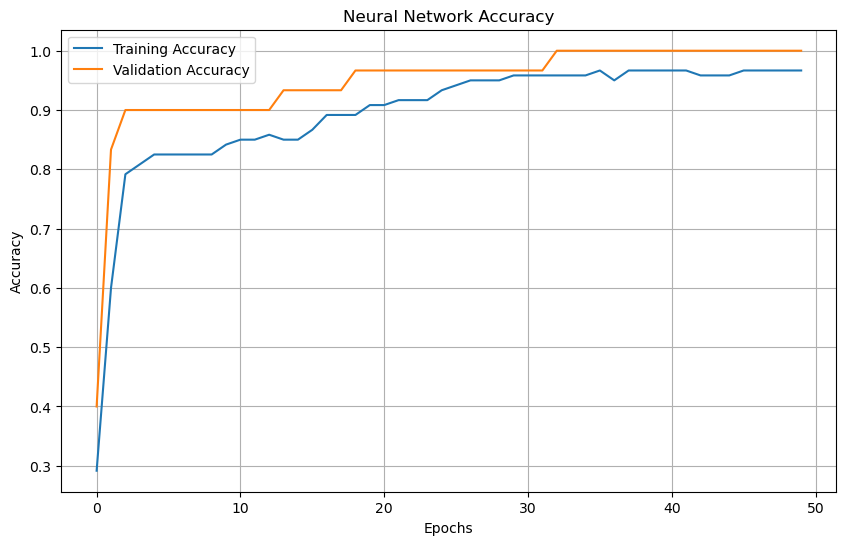

In [19]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and saved the training history as `history`
# Build and compile the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(3, activation='softmax')  # Output layer with 3 units for the 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=0)

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy')
plt.legend()
plt.grid(True)
plt.show()
